# Introduction

## Libraries

In [2]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os

# charting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sn

## Load Data

In [244]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')

## Clean Data

In [245]:
oecdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

In [250]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:35], axis=1, inplace=False)
#oecdTrimmed.info()

In [251]:
oecdTrimmed.drop(oecdTrimmed.columns[[14, 26]], axis=1, inplace=True)
#oecdTrimmed.info()

## Charting OECD Analysis

In [252]:
oecdCorr = oecdTrimmed.corr()
#oecdCorr

### Filter for Significant Correlations

In [253]:
filterDf = oecdCorr[((oecdCorr >= .5) | (oecdCorr <= -.5)) & (oecdCorr !=1.000)]
#filterDf


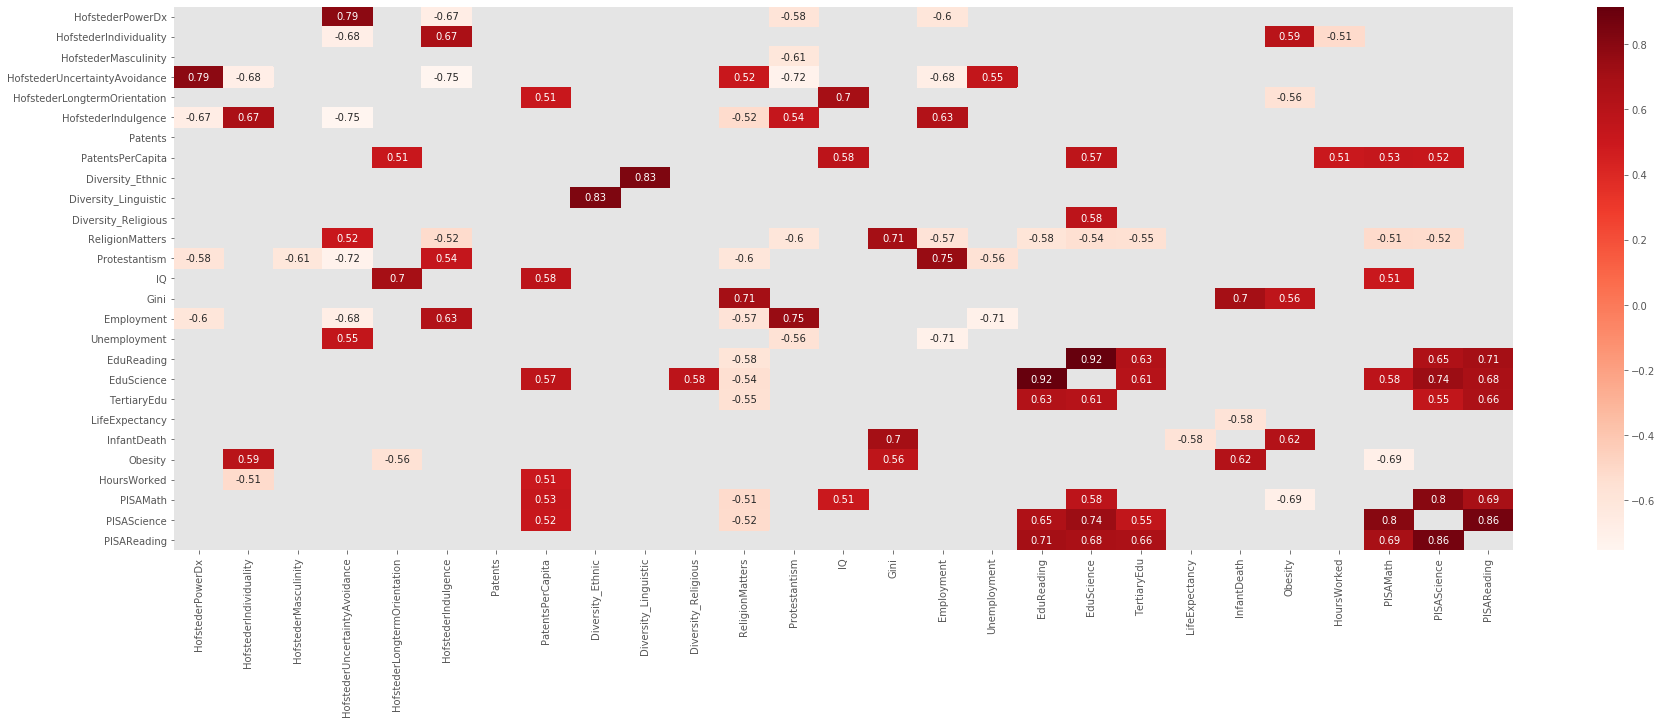

In [254]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()

## Function for Creation, Filtering, and Flattening

In [318]:


def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

newList = corrFilter(oecdTrimmed, .4)

In [319]:
newList

HofstederIndulgence     HofstederUncertaintyAvoidance   -0.752436
Protestantism           HofstederUncertaintyAvoidance   -0.722509
Unemployment            Employment                      -0.711838
Obesity                 PISAMath                        -0.689041
HofstederIndividuality  HofstederUncertaintyAvoidance   -0.682719
                                                           ...   
PISAScience             PISAMath                         0.800926
Diversity_Linguistic    Diversity_Ethnic                 0.831558
PISAScience             PISAReading                      0.865000
EduScience              EduReading                       0.915638
HofstederPowerDx        HofstederPowerDx                      NaN
Length: 85, dtype: float64

In [320]:
def filterForLabels(df: pd.DataFrame, label) :
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:
        return sideRight
    elif sideRight.empty:
        return sideLeft
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [321]:
filterForLabels(newList, 'errortest')

""


In [322]:
filterForLabels(newList, 'Gini')

,Corr
PISAMath,-0.470275
ReligionMatters,0.706751
Obesity,0.564622
InfantDeath,0.702415


In [323]:
filterForLabels(newList, 'InfantDeath')

,Corr
Diversity_Linguistic,0.409576
Obesity,0.623920
Gini,0.702415
LifeExpectancy,-0.575760
ReligionMatters,0.441223


In [324]:
filterForLabels(newList, 'Obesity')

,Corr
PISAMath,-0.689041
IQ,-0.427187
Gini,0.564622
HofstederLongtermOrientation,-0.560621
HofstederIndulgence,0.448870
Patents,0.470142
HofstederIndividuality,0.590268
InfantDeath,0.623920


In [325]:
filterForLabels(newList, 'LifeExpectancy')

InfantDeath   -0.57576
dtype: float64

In [326]:
filterForLabels(newList, 'ReligionMatters')

,Corr
Protestantism,-0.601954
Employment,-0.574547
TertiaryEdu,-0.545041
PISAScience,-0.523138
HofstederIndulgence,-0.519778
InfantDeath,0.441223
HofstederUncertaintyAvoidance,0.515928
EduReading,-0.583921
EduScience,-0.540493
PISAMath,-0.513071


In [327]:
filterForLabels(newList, 'PatentsPerCapita')

,Corr
TertiaryEdu,0.461519
HofstederLongtermOrientation,0.512250
IQ,0.577580
HoursWorked,0.507169
PISAScience,0.519392
PISAMath,0.526101
EduScience,0.571725


In [328]:
filterForLabels(newList, 'TertiaryEdu')

,Corr
Unemployment,-0.442974
ReligionMatters,-0.545041
PatentsPerCapita,0.461519
PISAScience,0.552557
EduScience,0.612088
EduReading,0.631033
PISAReading,0.662233


In [329]:
filterForLabels(newList, 'PISAMath')

,Corr
ReligionMatters,-0.513071
HofstederLongtermOrientation,0.471209
PatentsPerCapita,0.526101
PISAReading,0.688583
Obesity,-0.689041
Gini,-0.470275
EduReading,0.455403
IQ,0.511593
EduScience,0.580550
PISAScience,0.800926


In [330]:
filterForLabels(newList, 'PISAReading')

,Corr
ReligionMatters,-0.449642
TertiaryEdu,0.662233
EduScience,0.677716
EduReading,0.705153
PISAMath,0.688583
PISAScience,0.865000


In [331]:
filterForLabels(newList, 'PISAScience')

,Corr
PatentsPerCapita,0.519392
TertiaryEdu,0.552557
EduReading,0.650509
PISAMath,0.800926
PISAReading,0.865000
ReligionMatters,-0.523138
Diversity_Religious,0.499307
EduScience,0.735990
